In [1]:
import numpy as np
import matplotlib.pyplot as plt # for plotting
from IPython.display import clear_output
from time import sleep

Define the target function to be fitted

$\displaystyle f(x)=\frac{3}{(x-0.5)^2+1}$

In [3]:
def true_f(x):
    return( 3.0/((x-0.5)**2+1.0) )

Define the parametrized nonlinear function

$\displaystyle F(x)\left[\theta\right] = \frac{\theta_0}{(x - \theta_1)^2 + 1}$ ,

In [5]:
def f(theta,x):
    """
    theta are the parameters
    x are the input values
    """
    return(theta[0]/((x-theta[1])**2+1.0))

**Define the gradients of the functions**

We analytically calculate the gradient of $f[\theta]$ with respect to its parameters:

$\displaystyle \partial f/\partial\theta_0 = \frac{1}{(x-\theta_1)^2+1}$

and

$\displaystyle \partial f/\partial\theta_1 = \frac{2(x-\theta_1)\theta_0}{[(x-\theta_1)^2+1]^2}$.

The gradient vector is defined as $\displaystyle \nabla_{\theta}f[\theta]=(\partial f/\partial\theta_0, \partial f/\partial\theta_1)$.

In [7]:
def f_grad(theta,x):
    """
    Return the gradient of f with respect to theta
    """
    grad0 = 1./((x-theta[1])**2+1.0)
    grad1 = 2*(x-theta[1])*theta[0]/((x-theta[1])**2+1.0)**2

    return(np.array([grad0, grad1]))

In [9]:
# Get randomly sampled x values
def samples(nsamples,width):
    return(width*np.random.randn(nsamples))

### Cost

$\displaystyle (F(x)[\theta] - f(x))^2/2$

In [11]:
#Define the average cost function on a grid of 2 parameters
def get_avg_cost(theta0s,theta1s,nsamples, width):
    n0=len(theta0s)
    n1=len(theta1s)
    C=np.zeros([n0,n1])
    for j0 in range(n0):
        for j1 in range(n1):
            theta=np.array([theta0s[j0],theta1s[j1]])
            x=samples(nsamples,width)
            C[j0,j1]=0.5*np.average((f(theta,x)-true_f(x))**2)
    return(C)

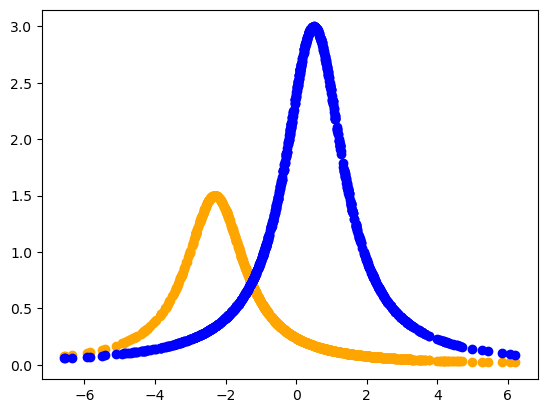

In [13]:
# take arbitrary parameters as starting point
theta=np.array([1.5,-2.3])

x=samples(1000,2.0)
# illustrate the parametrized function, at sampled points,
# compare against actual function
plt.scatter(x,f(theta,x),color="orange")
plt.scatter(x,true_f(x),color="blue")
plt.show()

40
40


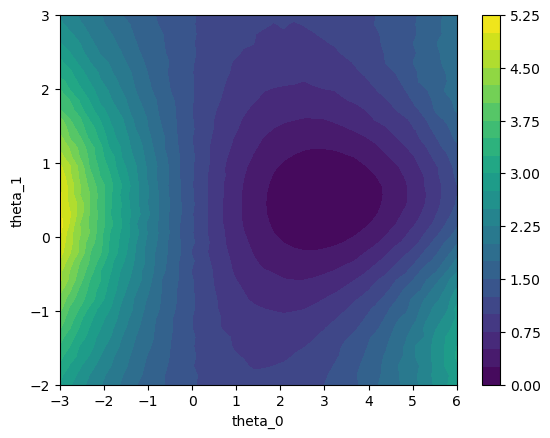

In [15]:
# Plot the cost function landscape
theta0s=np.linspace(-3,6,40)
theta1s=np.linspace(-2,3,40)
print (len(theta0s))
print (len(theta1s))
C=get_avg_cost(theta0s,theta1s,10000, 2.)
nlevels=20
X,Y=np.meshgrid(theta0s,theta1s,indexing='ij')
plt.contourf(X,Y,C,nlevels)
#plt.contour(X,Y,C,nlevels,colors="white")
plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.colorbar()
plt.show()
#print (C)

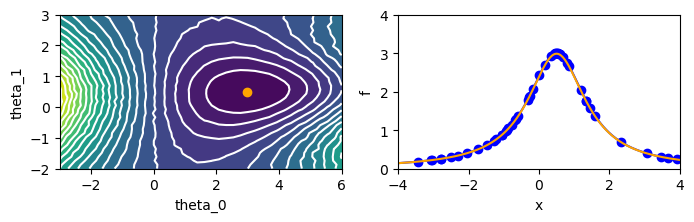

[2.98376882 0.49943142]


In [17]:
# Gradient descent
# take arbitrary parameters as starting point in a given range
theta0_range = 1.
theta1_range = 2.
theta=np.array([theta0_range,theta1_range])*np.random.rand(2)
print (theta)
alpha=0.2 # "learning rate" (gradient descent step size)
nsamples=50
nsteps=90

x_sweep=np.linspace(-4,4,300)
xrange = 2.

for n in range(nsteps):

    x=samples(nsamples, xrange) # get random samples

    # deviation from true function (vector):
    deviation=f(theta,x)-true_f(x)

    # do one gradient descent step:
    theta -= alpha*np.average(deviation[None,:]*f_grad(theta,x),axis=1)

    # Now: Plotting
    # compare true function (blue) against
    # parametrized function (orange)
    # blue dots indicate random points where
    # the true function was sampled in this step

    clear_output(wait=True)
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(8,2))

    nlevels=20
    ax[0].contourf(X,Y,C,nlevels)
    ax[0].contour(X,Y,C,nlevels,colors="white")
    ax[0].scatter([theta[0]],[theta[1]],color="orange")
    ax[0].set_xlim(theta0s[0],theta0s[-1])
    ax[0].set_ylim(theta1s[0],theta1s[-1])
    ax[0].set_xlabel("theta_0")
    ax[0].set_ylabel("theta_1")

    ax[1].plot(x_sweep,true_f(x_sweep),color="blue")
    ax[1].scatter(x,true_f(x),color="blue")
    ax[1].plot(x_sweep,f(theta,x_sweep),color="orange")
    ax[1].set_xlim(-4,4)
    ax[1].set_ylim(0.0,4.0)
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("f")

    plt.show()
    sleep(0.3)

print(theta) #print the final fitted values

Try the following:


* Implement gradient descent algorithm which will automatically stop when it can approximate the function well enough.
* Try to fit a sinusoidal function where `true_f(x)` is `np.sin(5.*x+1.0)`